## Assignment 1 Part 1

### Importing Dependencies

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import numpy as np
from display import visualize_keras_model, plot_training_curves
from helpers import combine_histories
import seaborn as sns

Using TensorFlow backend.


In [4]:
#Initial Parameters/Default Parameters
NB_EPOCH = 100
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 100
VALIDATION_SPLIT=0.2 # How much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

### Importing Data

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')


In [6]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

### Having a look at the dataset

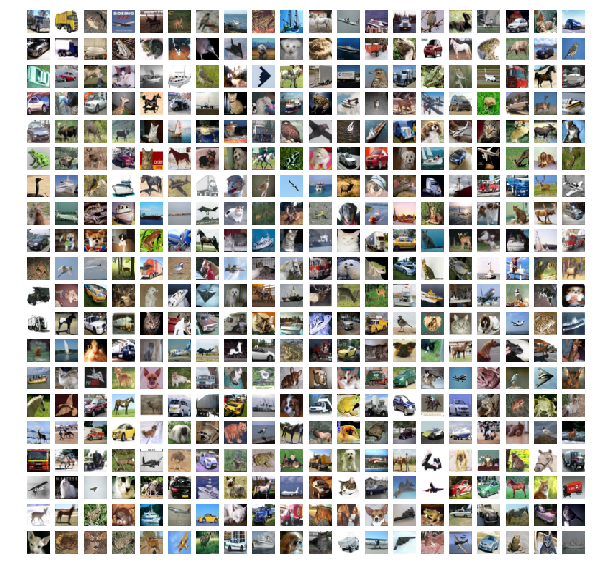

In [13]:
fig, axs = plt.subplots(20,20, sharex=True, sharey=True, figsize=(10,10))
for i, idx in enumerate(np.random.choice(len(x_train), 400, replace=False)):
    img = x_train[idx]
    ax = axs[i//20, i%20]
    ax.imshow(img)
    ax.axis('off')
sns.despine(fig, left=True, bottom=True)

In [7]:
RESHAPED = 3072 #(32*32*3) Defining the new shape, the way how the data will be input in the model
#float and normalize
x_train = x_train.reshape(50000, RESHAPED)
x_test = x_test.reshape(10000, RESHAPED)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')  
x_train /= 255 #normalization (255 is the maximum number of pixels)
x_test /= 255 #normalization (255 is the maximum number of pixels)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(50000, 'train samples')
(10000, 'test samples')


In [8]:
# convert class vectors to binary class matrices, one hot encoding 
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [9]:
print (x_train.shape)
print (Y_train.shape)

(50000, 3072)
(50000, 10)


So we are almost all set to try our first model. Let's try the very basic model first. The first model is going to be the simplest model, though better start can be given to the first model but we choose to go step by step to see and observe changes closely and learn from them.

In [17]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


The first simplest model just consist of a input layer and a activation function. Sumary of the model can be seen above and we will see a illustration of model in the image below.

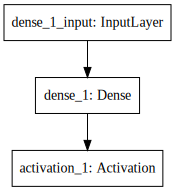

In [18]:
visualize_keras_model(model)

For starting we are using "categorical_crossentropy" as our loss function and default optimizer whihc is SVG as our optimizer, the metrics is set to accuracy. [Accuracy: This is the proportion of correct predictions with respect to the targets]

In [20]:
#After defining the model, we need to compile it so that we can train the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [21]:
#traning the model and validation on 20% traning split
history = model.fit(x_train, Y_train,                       #Starting with 23 epochs, 2 and 3 are my favourite numbers
batch_size=BATCH_SIZE, epochs=23,             
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 40000 samples, validate on 10000 samples
Epoch 1/23
40000/40000 [==============================] - 1s - loss: 2.0347 - acc: 0.2686 - val_loss: 1.9366 - val_acc: 0.3189
Epoch 2/23
40000/40000 [==============================] - 1s - loss: 1.8868 - acc: 0.3383 - val_loss: 1.8773 - val_acc: 0.3415
Epoch 3/23
40000/40000 [==============================] - 1s - loss: 1.8450 - acc: 0.3570 - val_loss: 1.8745 - val_acc: 0.3404
Epoch 4/23
40000/40000 [==============================] - 1s - loss: 1.8213 - acc: 0.3674 - val_loss: 1.8666 - val_acc: 0.3441
Epoch 5/23
40000/40000 [==============================] - 1s - loss: 1.8043 - acc: 0.3726 - val_loss: 1.8283 - val_acc: 0.3664
Epoch 6/23
40000/40000 [==============================] - 1s - loss: 1.7932 - acc: 0.3792 - val_loss: 1.8350 - val_acc: 0.3577
Epoch 7/23
40000/40000 [==============================] - 1s - loss: 1.7825 - acc: 0.3813 - val_loss: 1.8272 - val_acc: 0.3627
Epoch 8/23
40000/40000 [==============================] - 1s 

In [23]:
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)

print("Test score:", score[0])
print('Test accuracy:', score[1])

 9920/10000 [============================>.] - ETA: 0s('Test score:', 1.746449063873291)
('Test accuracy:', 0.39629999999999999)


We see that we started very low on traning accuracy (26.86%) but it gradually increased to 41.29% over the period of 23 epochs, the validation accuracy was 39.63 percent at the last epoch and the test accuracy came out to be 39.62 percent. Let us observe how the graphs look for these situations.

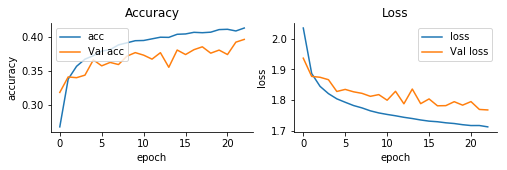

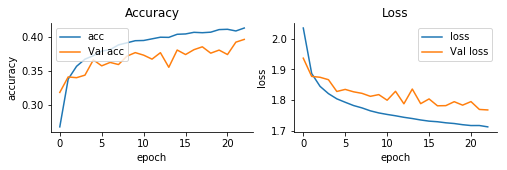

In [24]:
plot_training_curves(history.history)

The accuracy can be instantly said to be a bad accuracy. Though the trend for the tranning and validation accuracy is upward at 23rd epoch, we can definetly try increasing the number of epochs. But our model is very simple to learn features exibited by 40000 images. Let's extend our model and add 2 more hidden layers to it so that it can learn the features better and let's increase the number of epochs to 40.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               307300    
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


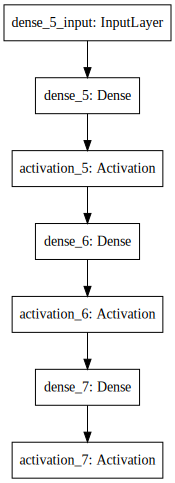

In [26]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
visualize_keras_model(model)

We are ready with our next model and above schematic gives a high level overview of it. Let's train it and see how it performs.

In [30]:
history_1 = model.fit(x_train, Y_train,
batch_size= BATCH_SIZE, epochs= 40,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 3s - loss: 1.5343 - acc: 0.4584 - val_loss: 1.6371 - val_acc: 0.4218
Epoch 2/40
40000/40000 [==============================] - 3s - loss: 1.5229 - acc: 0.4643 - val_loss: 1.5871 - val_acc: 0.4454
Epoch 3/40
40000/40000 [==============================] - 3s - loss: 1.5100 - acc: 0.4677 - val_loss: 1.5747 - val_acc: 0.4474
Epoch 4/40
40000/40000 [==============================] - 3s - loss: 1.5007 - acc: 0.4715 - val_loss: 1.5718 - val_acc: 0.4503
Epoch 5/40
40000/40000 [==============================] - 3s - loss: 1.4919 - acc: 0.4756 - val_loss: 1.5701 - val_acc: 0.4497
Epoch 6/40
40000/40000 [==============================] - 3s - loss: 1.4805 - acc: 0.4783 - val_loss: 1.5563 - val_acc: 0.4516
Epoch 7/40
40000/40000 [==============================] - 3s - loss: 1.4684 - acc: 0.4836 - val_loss: 1.5660 - val_acc: 0.4490
Epoch 8/40
40000/40000 [==============================] - 3s 

The tranning accuracy started high at 45.84% as compared to last model but ended up at 55.55%. We have made a good improvements over the last model with validation and testing accuracy around 50% but still it's not a model that we can use for making predections. Let's visualize the performance of model through a graph and then we can stratagize to make improvements for the next model.

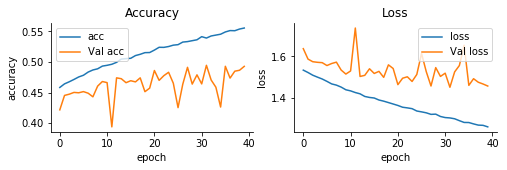

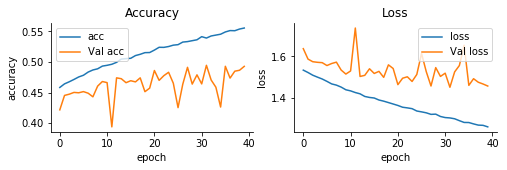

In [32]:
plot_training_curves(history_1.history)

The tranning curve trend is still upwards. Let's try to improve upon our model. The default batch size of 128 is too low for the tranning set of 40000 tranning samples. Let's keep the same configration for the model and try to see if there is increase in the accuracy by increading the batch size. Epochs are still kept at 40.

In [33]:
history_2 = model.fit(x_train, Y_train,
batch_size= 1000, epochs= 40,                          #Batch size increased to 1000
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 3s - loss: 1.2073 - acc: 0.5785 - val_loss: 1.4033 - val_acc: 0.5115
Epoch 2/40
40000/40000 [==============================] - 2s - loss: 1.2043 - acc: 0.5776 - val_loss: 1.4147 - val_acc: 0.5048
Epoch 3/40
40000/40000 [==============================] - 2s - loss: 1.2041 - acc: 0.5789 - val_loss: 1.4078 - val_acc: 0.5128
Epoch 4/40
40000/40000 [==============================] - 2s - loss: 1.2002 - acc: 0.5798 - val_loss: 1.4067 - val_acc: 0.5113
Epoch 5/40
40000/40000 [==============================] - 2s - loss: 1.2041 - acc: 0.5794 - val_loss: 1.4069 - val_acc: 0.5106
Epoch 6/40
40000/40000 [==============================] - 2s - loss: 1.2022 - acc: 0.5789 - val_loss: 1.4038 - val_acc: 0.5102
Epoch 7/40
40000/40000 [==============================] - 2s - loss: 1.2002 - acc: 0.5803 - val_loss: 1.4220 - val_acc: 0.5010
Epoch 8/40
40000/40000 [==============================] - 2s 

All the accuracies definately increased by increasing the batch size but the improvement isn't drastic. I would like to train the model liitle longer and see if the same configration has more potential to give better results. Epochs increased to 60.

In [35]:
history_2 = model.fit(x_train, Y_train,
batch_size= 1000, epochs= 60,                          #Batch size increased to 1000
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/60
40000/40000 [==============================] - 2s - loss: 1.1721 - acc: 0.5902 - val_loss: 1.4133 - val_acc: 0.5072
Epoch 2/60
40000/40000 [==============================] - 2s - loss: 1.1833 - acc: 0.5865 - val_loss: 1.4466 - val_acc: 0.4985
Epoch 3/60
40000/40000 [==============================] - 2s - loss: 1.1790 - acc: 0.5890 - val_loss: 1.4111 - val_acc: 0.5097
Epoch 4/60
40000/40000 [==============================] - 2s - loss: 1.1752 - acc: 0.5896 - val_loss: 1.4116 - val_acc: 0.5061
Epoch 5/60
40000/40000 [==============================] - 2s - loss: 1.1755 - acc: 0.5901 - val_loss: 1.4141 - val_acc: 0.5105
Epoch 6/60
40000/40000 [==============================] - 2s - loss: 1.1677 - acc: 0.5925 - val_loss: 1.4108 - val_acc: 0.5083
Epoch 7/60
40000/40000 [==============================] - 2s - loss: 1.1795 - acc: 0.5870 - val_loss: 1.4059 - val_acc: 0.5141
Epoch 8/60
40000/40000 [==============================] - 2s 

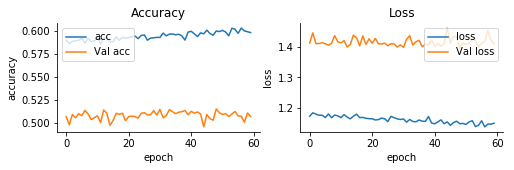

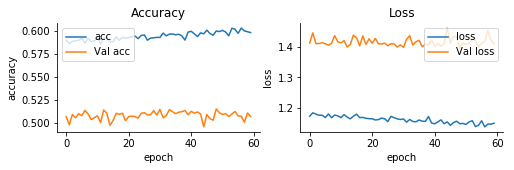

In [36]:
plot_training_curves(history_2.history)

Both the tranning and validation curves are flatten out and it's time to think about how can we improve the model. Maybe we are not giving enough time to the network to learn features properly, and as we have increased the batch size it makes sense to increase number of neurons in each hidden layer to provide the network enough capapblity to learn new features. Let's add another hidden layer and increase the number of neurons to 350 from default 100.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 350)               1075550   
_________________________________________________________________
activation_12 (Activation)   (None, 350)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 350)               122850    
_________________________________________________________________
activation_13 (Activation)   (None, 350)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 350)               122850    
_________________________________________________________________
activation_14 (Activation)   (None, 350)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                3510      
__________

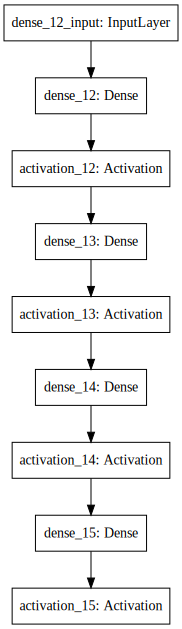

In [38]:
model = Sequential()
model.add(Dense(350, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(350))
model.add(Activation('relu'))
model.add(Dense(350))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
visualize_keras_model(model)

In [40]:
history_3 = model.fit(x_train, Y_train,
batch_size= 128, epochs= 40,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 10s - loss: 1.7147 - acc: 0.3964 - val_loss: 1.7669 - val_acc: 0.3567
Epoch 2/40
40000/40000 [==============================] - 10s - loss: 1.6737 - acc: 0.4121 - val_loss: 1.7307 - val_acc: 0.3919
Epoch 3/40
40000/40000 [==============================] - 10s - loss: 1.6451 - acc: 0.4212 - val_loss: 1.7051 - val_acc: 0.3918
Epoch 4/40
40000/40000 [==============================] - 11s - loss: 1.6135 - acc: 0.4331 - val_loss: 1.6544 - val_acc: 0.4091
Epoch 5/40
40000/40000 [==============================] - 10s - loss: 1.5887 - acc: 0.4404 - val_loss: 1.6361 - val_acc: 0.4243
Epoch 6/40
40000/40000 [==============================] - 10s - loss: 1.5671 - acc: 0.4480 - val_loss: 1.5878 - val_acc: 0.4446
Epoch 7/40
40000/40000 [==============================] - 10s - loss: 1.5465 - acc: 0.4558 - val_loss: 1.6487 - val_acc: 0.4130
Epoch 8/40
40000/40000 [==============================

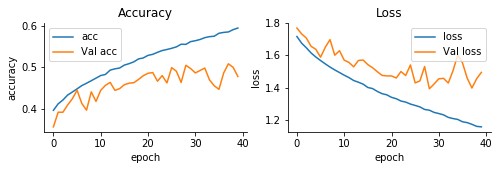

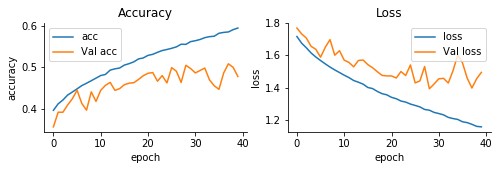

In [41]:
plot_training_curves(history_3.history)

At this point we are able to get higher tranning accuracies but validation accuracies and test accuracy are lower than the simple models we described above. We are definely being better at overfitting the model but are not able to see any rise in the test accuracies and validation accuracy. 

Let's decrease number of neurons to 150 and get back to our 2 hidden layer network model. We will introduce droupout to induce regularization in our model and see if we can perform better with the model. Epoch will be kept at 40. Dropout percentage is 30 percent.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 150)               460950    
_________________________________________________________________
activation_20 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_21 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1510      
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
Total para

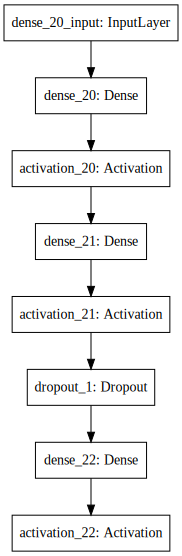

In [46]:
model = Sequential()
model.add(Dense(150, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
visualize_keras_model(model)

In [47]:
history_4 = model.fit(x_train, Y_train,
batch_size= 128, epochs= 40,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 6s - loss: 2.0837 - acc: 0.2438 - val_loss: 1.9358 - val_acc: 0.3236
Epoch 2/40
40000/40000 [==============================] - 4s - loss: 1.9157 - acc: 0.3140 - val_loss: 1.8732 - val_acc: 0.3409
Epoch 3/40
40000/40000 [==============================] - 4s - loss: 1.8465 - acc: 0.3447 - val_loss: 1.8024 - val_acc: 0.3696
Epoch 4/40
40000/40000 [==============================] - 4s - loss: 1.7993 - acc: 0.3605 - val_loss: 1.7707 - val_acc: 0.3760
Epoch 5/40
40000/40000 [==============================] - 4s - loss: 1.7655 - acc: 0.3750 - val_loss: 1.7316 - val_acc: 0.3896
Epoch 6/40
40000/40000 [==============================] - 5s - loss: 1.7391 - acc: 0.3845 - val_loss: 1.7178 - val_acc: 0.3908
Epoch 7/40
40000/40000 [==============================] - 5s - loss: 1.7135 - acc: 0.3943 - val_loss: 1.7105 - val_acc: 0.3980
Epoch 8/40
40000/40000 [==============================] - 4s 

In [50]:
model = Sequential()
model.add(Dense(150, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
visualize_keras_model(model)
history_5 = model.fit(x_train, Y_train,
batch_size= 250, epochs= 70,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 150)               460950    
_________________________________________________________________
activation_29 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_30 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1510      
_________________________________________________________________
activation_31 (Activation)   (None, 10)                0         
Total params: 485,110
Trainable params: 485,110
Non-trainable params: 0
_________________________________________________________________
Trai

### Reducing the learning rate

In [10]:
model = Sequential()
model.add(Dense(150, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=SGD(lr=0.0001),
metrics=['accuracy'])
visualize_keras_model(model)
history_6 = model.fit(x_train, Y_train,
batch_size= 250, epochs= 70,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(x_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               460950    
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 485,110
Trainable params: 485,110
Non-trainable params: 0
_________________________________________________________________
Trai

40000/40000 [==============================] - 4s - loss: 2.0660 - acc: 0.2678 - val_loss: 2.0666 - val_acc: 0.26720.2
Epoch 56/70
40000/40000 [==============================] - 4s - loss: 2.0636 - acc: 0.2691 - val_loss: 2.0642 - val_acc: 0.2674
Epoch 57/70
40000/40000 [==============================] - 4s - loss: 2.0611 - acc: 0.2701 - val_loss: 2.0618 - val_acc: 0.2686
Epoch 58/70
40000/40000 [==============================] - 5s - loss: 2.0587 - acc: 0.2708 - val_loss: 2.0595 - val_acc: 0.2693
Epoch 59/70
40000/40000 [==============================] - 4s - loss: 2.0563 - acc: 0.2717 - val_loss: 2.0572 - val_acc: 0.2705
Epoch 60/70
40000/40000 [==============================] - 4s - loss: 2.0539 - acc: 0.2729 - val_loss: 2.0549 - val_acc: 0.2708
Epoch 61/70
40000/40000 [==============================] - 4s - loss: 2.0515 - acc: 0.2743 - val_loss: 2.0527 - val_acc: 0.2722
Epoch 62/70
40000/40000 [==============================] - 4s - loss: 2.0492 - acc: 0.2747 - val_loss: 2.0504 - v

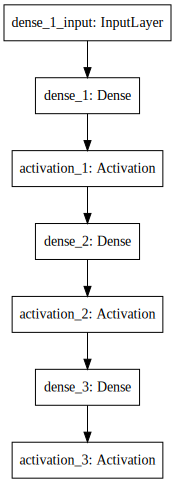

In [11]:
visualize_keras_model(model)

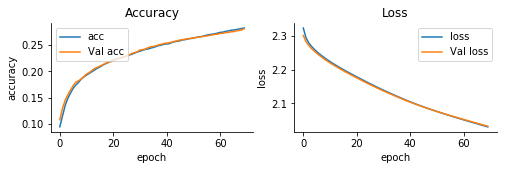

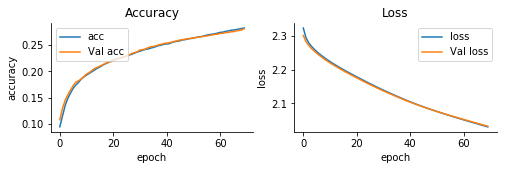

In [12]:
plot_training_curves(history_6.history)

### Final Analysis

6 different kinds of MLP models starting from the very basic and varied these 6 hyper parameters 
* No of epochs
* Batch size
* Network configuration: Number of neurons in a layer, Number of layers
* Learning rate
* Activation function
* Dropout rates

After doing a logical combination of all these layer, trends in accuracies were observed and a genuine attempt was made to understand the variation of accuracy with different hyper parameters.

Observations:

* Highest validation and test accuracy were always around 50 percent, even though in some of the models tranning accuracy was around 60 percet.

* MLP is for sure a very simplestic model for classification of image, atleast for the depth of the layers we tried. 

* There were several models overfitting the data, which could be clearly seen from the fact that the tranning accuracy was continously increasing but the validation accuracy was constantly same or even decreasing in some cases.

* The best model will be the model at line 35, optimizer as SVG, hidden layer activation function as relu, 2 hidden,  layers, run for 60 epoch. The test accuracy is around 50 percent and tranning accuracy is around 60 percent. The model almost got saturated suggesting that there is very rare chance of improvement even if we run more epochs. It's not a good accuracy but the best we have and since the model is saturated we can trust that atleast getting 50 percent accuracy is sure.